In [138]:
"""
1. At the beginning of your code write a comment that states the topic of your research
project.

2. Some of you have outlined multiple questions to pursue. For this assignment pick ONE
of those questions and add it to the comments.
3. Many of you have outlined multiple ideas of plots to create or calculations to make.
For this assignment pick ONE of those ideas and add it to the comments.
4. The title of the code should be informative with regards to what the code does.
Queshtion
For my topic I will analysis now the inital galxies contribute to the final shape of the remant. 
I will do this by maping the density of MW,M31 and both combined as veiwed from the top down.
The queshtion I am trying to answer is: Once merged do M33/Mw stick to gether are create recognizable strucures in the remanant?

Step 1: combine M31 and MW halo particles inot one data, keeping track of which particles come from which system
    we want to use the previously made fucntions combine data, make new txt file with 8th columb with system
Step 2: find COM of combined data
    use center of mass function for this
Step 3: rotate system so we can view it face on
    Lab 7
Step 4: plot denisty of head on view
    step 4a: PLot just Mw particles
    step 4b: PLot just M31 particles
    step 4c: PLot both MW and M31 particles

"""


'\n1. At the beginning of your code write a comment that states the topic of your research\nproject.\n\n2. Some of you have outlined multiple questions to pursue. For this assignment pick ONE\nof those questions and add it to the comments.\n3. Many of you have outlined multiple ideas of plots to create or calculations to make.\nFor this assignment pick ONE of those ideas and add it to the comments.\n4. The title of the code should be informative with regards to what the code does.\nQueshtion\nFor my topic I will analysis now the inital galxies contribute to the final shape of the remant. \nI will do this by maping the density of MW,M31 and both combined as veiwed from the top down.\nThe queshtion I am trying to answer is: Once merged do M33/Mw stick to gether are create recognizable strucures in the remanant?\n\nStep 1: combine M31 and MW halo particles inot one data, keeping track of which particles come from which system\n    we want to use the previously made fucntions combine data,

In [140]:



# import modules
import numpy as np
import astropy.units as u
from astropy.constants import G

# import plotting modules
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# my modules
from ReadFile import Read
from CenterOfMassCopy1 import CenterOfMass
from MassProfile import MassProfile

# for contours
import scipy.optimize as so


In [142]:
#Get data for snap 630/gyr 9 for both MW and M31
MW=np.genfromtxt('VLowRes/MW/MW_630.txt',skip_header=3)
M31=np.genfromtxt('VLowRes/M31/M31_630.txt',skip_header=3)

In [143]:
#create index the will remove all non halo particles
index = np.where(MW[:,0] == 1)
#Create array full of ones with one more columb then the MW data
a = np.full((len(MW),len(MW[0])+1),1,dtype='float')
#add MW data to new array, columb 8 keeps its 1
a[:,:-1] = MW
#remove none halo particles
a=a[index]
#create index the will remove all non halo particles
index = np.where(M31[:,0] == 1)
#Create array full of twos with one more columb then the MW data
b = np.full((len(M31),len(M31[0])+1),2,dtype='float')
#add M31 data to new array, columb 8 keeps its 2
b[:,:-1] = M31
#remove none halo particles
b=b[index]
#combine MW and M31 arrays
halo=np.concatenate((a,b))

In [144]:
#create txt file with combined halo paricles so we can use center of mass class
np.savetxt("TestA.txt", halo,  comments='#', 
                   header="{:>10s}{:>11s}{:>11s}{:>11s}{:>11s}{:>11s}{:>11s}{:>11s}"\
                   .format('t', 'm', 'x', 'y', 'z', 'vx', 'vy', 'vz','gal'))

In [145]:
# Create a COM of object for for combined particles using center of mass object from HW 4
COMD = CenterOfMass("TestA.txt",1)

In [146]:
# Compute COM of all halo particles
COMP = COMD.COM_P(0.1)

COMV = COMD.COM_V(COMP[0],COMP[1],COMP[2])
# Determine positions of helo particles relative to COM 
xD = COMD.x - COMP[0].value 
yD = COMD.y - COMP[1].value 
zD = COMD.z - COMP[2].value 

# total magnitude
rtot = np.sqrt(xD**2 + yD**2 + zD**2)

# Determine velocities of particles relatiev to COM motion
vxD = COMD.vx - COMV[0].value 
vyD = COMD.vy - COMV[1].value 
vzD = COMD.vz - COMV[2].value 

# total velocity 
vtot = np.sqrt(vxD**2 + vyD**2 + vzD**2)

# Arrays for r and v 
r = np.array([xD,yD,zD]).T # transposed 
v = np.array([vxD,vyD,vzD]).T

CHANGE =  1.5374937697334872
maxR 2809.0641824116465
CHANGE =  1.8740561378843665
maxR 1404.5320912058232
CHANGE =  0.33172364981837177
maxR 702.2660456029116
CHANGE =  1.8423146384483573
maxR 351.1330228014558
CHANGE =  3.920007789584105
maxR 175.5665114007279
CHANGE =  0.5095592902894737
maxR 87.78325570036395
CHANGE =  0.8442509601836434
maxR 43.891627850181976
CHANGE =  0.042645959042260984
maxR 21.945813925090988


In [147]:
# Code for plotting contours
# from https://gist.github.com/adrn/3993992
#function from lab 7

def find_confidence_interval(x, pdf, confidence_level):
    return pdf[pdf > x].sum() - confidence_level

def density_contour(xdata, ydata, nbins_x, nbins_y, ax=None, **contour_kwargs):
    """ Create a density contour plot.
    Parameters
    ----------
    xdata : numpy.ndarray
    ydata : numpy.ndarray
    nbins_x : int
        Number of bins along x dimension
    nbins_y : int
        Number of bins along y dimension
    ax : matplotlib.Axes (optional)
        If supplied, plot the contour to this axis. Otherwise, open a new figure
    contour_kwargs : dict
        kwargs to be passed to pyplot.contour()
        
    Example Usage
    -------------
     density_contour(x pos, y pos, contour res, contour res, axis, colors for contours)
     e.g.:
     density_contour(xD, yD, 80, 80, ax=ax, 
         colors=['red','orange', 'yellow', 'orange', 'yellow'])

    """

    H, xedges, yedges = np.histogram2d(xdata, ydata, bins=(nbins_x,nbins_y), density=True)
    # NOTE : if you are using the latest version of python, in the above: 
    # instead of normed=True, use density=True
    
    x_bin_sizes = (xedges[1:] - xedges[:-1]).reshape((1,nbins_x))
    y_bin_sizes = (yedges[1:] - yedges[:-1]).reshape((nbins_y,1))

    pdf = (H*(x_bin_sizes*y_bin_sizes))
    
    X, Y = 0.5*(xedges[1:]+xedges[:-1]), 0.5*(yedges[1:]+yedges[:-1])
    Z = pdf.T
    fmt = {}
    
    ### Adjust Here #### 
    
    # Contour Levels Definitions
    one_sigma = so.brentq(find_confidence_interval, 0., 1., args=(pdf, 0.68))
    two_sigma = so.brentq(find_confidence_interval, 0., 1., args=(pdf, 0.95))
    three_sigma = so.brentq(find_confidence_interval, 0., 1., args=(pdf, 0.99))
    
    # You might need to add a few levels
    onetwo_sigma = so.brentq(find_confidence_interval, 0., 1., args=(pdf, 0.80))

    # Array of Contour levels. Adjust according to the above
    levels = [one_sigma, onetwo_sigma, two_sigma, three_sigma][::-1]
    
    # contour level labels  Adjust accoding to the above.
    strs = ['0.68','0.80','0.95', '0.99'][::-1]

    
    ###### 
    
    if ax == None:
        contour = plt.contour(X, Y, Z, levels=levels, origin="lower", **contour_kwargs)
        for l, s in zip(contour.levels, strs):
            fmt[l] = s
        plt.clabel(contour, contour.levels, inline=True, fmt=fmt, fontsize=12)

    else:
        contour = ax.contour(X, Y, Z, levels=levels, origin="lower", **contour_kwargs)
        for l, s in zip(contour.levels, strs):
            fmt[l] = s
        ax.clabel(contour, contour.levels, inline=True, fmt=fmt, fontsize=12)
    
    return contour

In [148]:
#functino to rotate particls so that angular momentum is aligned with z axis
#code from lab 7
def RotateFrame(posI,velI):
    """a function that will rotate the position and velocity vectors
    so that the disk angular momentum is aligned with z axis. 
    
    PARAMETERS
    ----------
        posI : `array of floats`
             3D array of positions (x,y,z)
        velI : `array of floats`
             3D array of velocities (vx,vy,vz)
             
    RETURNS
    -------
        pos: `array of floats`
            rotated 3D array of positions (x,y,z) 
            such that disk is in the XY plane
        vel: `array of floats`
            rotated 3D array of velocities (vx,vy,vz) 
            such that disk angular momentum vector
            is in the +z direction 
    """
    
    # compute the angular momentum
    L = np.sum(np.cross(posI,velI), axis=0)
    
    # normalize the angular momentum vector
    L_norm = L/np.sqrt(np.sum(L**2))


    # Set up rotation matrix to map L_norm to
    # z unit vector (disk in xy-plane)
    
    # z unit vector
    z_norm = np.array([0, 0, 1])
    
    # cross product between L and z
    vv = np.cross(L_norm, z_norm)
    s = np.sqrt(np.sum(vv**2))
    
    # dot product between L and z 
    c = np.dot(L_norm, z_norm)
    
    # rotation matrix
    I = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
    v_x = np.array([[0, -vv[2], vv[1]], [vv[2], 0, -vv[0]], [-vv[1], vv[0], 0]])
    R = I + v_x + np.dot(v_x, v_x)*(1 - c)/s**2

    # Rotate coordinate system
    pos = np.dot(R, posI.T).T
    vel = np.dot(R, velI.T).T
    
    return pos, vel


In [149]:
#find new positaion and velocity vectors after frame is rotated
rn, vn = RotateFrame(r,v)

In [150]:
#create index to select paricles from spescific system 1=MW 2=M31
indexMW = np.where(halo[:,8] == 1)
indexM31 = np.where(halo[:,8] == 2)

In [153]:
#apply indexs to seperate MW and M31 particles
rMW=rn[indexMW]
rM31=rn[indexM31]

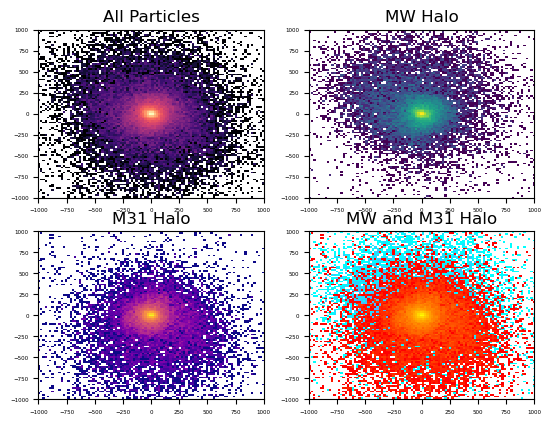

In [154]:
# Rotated M31 Disk - FACE ON

# M31 Disk Density 
fig, ax = plt.subplots(2, 2)
ax[0, 0].hist2d(rn[:,0],rn[:,1], bins=1000, norm=LogNorm(), cmap='magma')
ax[0, 0].set_title('All Particles')
ax[0, 1].hist2d(rMW[:,0],rMW[:,1], bins=1000, norm=LogNorm(), cmap='viridis')
ax[0, 1].set_title('MW Halo')
ax[1, 0].hist2d(rM31[:,0],rM31[:,1], bins=1000, norm=LogNorm(), cmap='plasma')
ax[1, 0].set_title('M31 Halo')
ax[1, 1].hist2d(rMW[:,0],rMW[:,1], bins=1000, norm=LogNorm(), cmap='cool')
ax[1, 1].hist2d(rM31[:,0],rM31[:,1], bins=1000, norm=LogNorm(), cmap='autumn')
ax[1, 1].set_title('MW and M31 Halo')



ax[0, 0].set_xlim(-1000,1000)
ax[0, 0].set_ylim(-1000,1000)

ax[0, 1].set_xlim(-1000,1000)
ax[0, 1].set_ylim(-1000,1000)

ax[1, 0].set_xlim(-1000,1000)
ax[1, 0].set_ylim(-1000,1000)

ax[1, 1].set_xlim(-1000,1000)
ax[1, 1].set_ylim(-1000,1000)


#cbar = plt.colorbar()
#cbar.set_label("Number of disk particle per bin", fontsize=15)

# make the contour plot
# x pos, y pos, contour res, contour res, axis, colors for contours.
# ADD HERE
#density_contour(rn[:,0], rn[:,1], 80,80, ax=ax, colors=['yellow','red','blue','black'])

# Add axis labels
"""plt.xlabel(' x kpc ', fontsize=22)
plt.ylabel(' y kpc ', fontsize=22)

#set axis limits
plt.ylim(-1000,1000)
plt.xlim(-1000,1000)
"""
#adjust tick label font size
label_size = 4
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size


# Save to a file 
plt.savefig('FaceOn_Density.png')


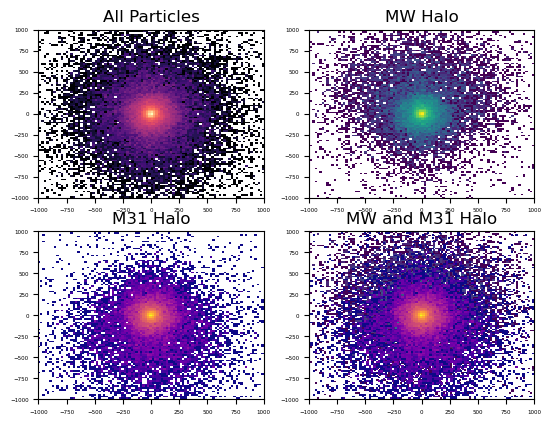

In [155]:
# Rotated M31 Disk - FACE ON

# M31 Disk Density 
fig, ax = plt.subplots(2, 2)
ax[0, 0].hist2d(rn[:,2],rn[:,1], bins=1000, norm=LogNorm(), cmap='magma')
ax[0, 0].set_title('All Particles')
ax[0, 1].hist2d(rMW[:,2],rMW[:,1], bins=1000, norm=LogNorm(), cmap='viridis')
ax[0, 1].set_title('MW Halo')
ax[1, 0].hist2d(rM31[:,2],rM31[:,1], bins=1000, norm=LogNorm(), cmap='plasma')
ax[1, 0].set_title('M31 Halo')
ax[1, 1].hist2d(rMW[:,2],rMW[:,1], bins=1000, norm=LogNorm(), cmap='viridis')
ax[1, 1].hist2d(rM31[:,2],rM31[:,1], bins=1000, norm=LogNorm(), cmap='plasma')
ax[1, 1].set_title('MW and M31 Halo')



ax[0, 0].set_xlim(-1000,1000)
ax[0, 0].set_ylim(-1000,1000)

ax[0, 1].set_xlim(-1000,1000)
ax[0, 1].set_ylim(-1000,1000)

ax[1, 0].set_xlim(-1000,1000)
ax[1, 0].set_ylim(-1000,1000)

ax[1, 1].set_xlim(-1000,1000)
ax[1, 1].set_ylim(-1000,1000)


#cbar = plt.colorbar()
#cbar.set_label("Number of disk particle per bin", fontsize=15)

# make the contour plot
# x pos, y pos, contour res, contour res, axis, colors for contours.
# ADD HERE
#density_contour(rn[:,0], rn[:,1], 80,80, ax=ax, colors=['yellow','red','blue','black'])

# Add axis labels
"""plt.xlabel(' x kpc ', fontsize=22)
plt.ylabel(' y kpc ', fontsize=22)

#set axis limits
plt.ylim(-1000,1000)
plt.xlim(-1000,1000)
"""
#adjust tick label font size
label_size = 4
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size


# Save to a file 
plt.savefig('FaceOn_Density.png')


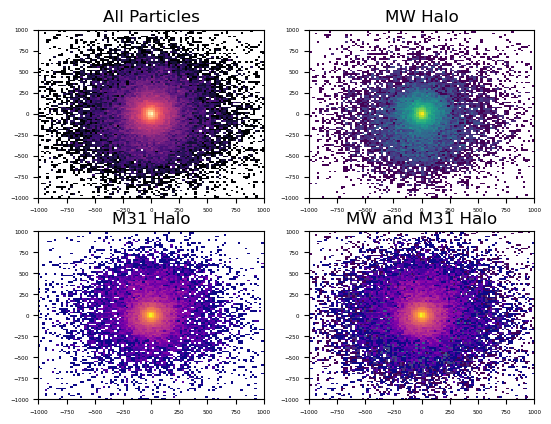

In [156]:
# Rotated M31 Disk - FACE ON

# M31 Disk Density 
fig, ax = plt.subplots(2, 2)
ax[0, 0].hist2d(rn[:,2],rn[:,0], bins=1000, norm=LogNorm(), cmap='magma')
ax[0, 0].set_title('All Particles')
ax[0, 1].hist2d(rMW[:,2],rMW[:,0], bins=1000, norm=LogNorm(), cmap='viridis')
ax[0, 1].set_title('MW Halo')
ax[1, 0].hist2d(rM31[:,2],rM31[:,0], bins=1000, norm=LogNorm(), cmap='plasma')
ax[1, 0].set_title('M31 Halo')
ax[1, 1].hist2d(rMW[:,2],rMW[:,0], bins=1000, norm=LogNorm(), cmap='viridis')
ax[1, 1].hist2d(rM31[:,2],rM31[:,0], bins=1000, norm=LogNorm(), cmap='plasma')
ax[1, 1].set_title('MW and M31 Halo')



ax[0, 0].set_xlim(-1000,1000)
ax[0, 0].set_ylim(-1000,1000)

ax[0, 1].set_xlim(-1000,1000)
ax[0, 1].set_ylim(-1000,1000)

ax[1, 0].set_xlim(-1000,1000)
ax[1, 0].set_ylim(-1000,1000)

ax[1, 1].set_xlim(-1000,1000)
ax[1, 1].set_ylim(-1000,1000)


#cbar = plt.colorbar()
#cbar.set_label("Number of disk particle per bin", fontsize=15)

# make the contour plot
# x pos, y pos, contour res, contour res, axis, colors for contours.
# ADD HERE
#density_contour(rn[:,0], rn[:,1], 80,80, ax=ax, colors=['yellow','red','blue','black'])

# Add axis labels
"""plt.xlabel(' x kpc ', fontsize=22)
plt.ylabel(' y kpc ', fontsize=22)

#set axis limits
plt.ylim(-1000,1000)
plt.xlim(-1000,1000)
"""
#adjust tick label font size
label_size = 4
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size


# Save to a file 
plt.savefig('FaceOn_Density.png')
